In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

### STEP-1 Read Data

In [2]:
# Decraling Path to dataset
path = os.path.join("../data", "insurance.csv")

In [3]:
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### STEP-2 Data Preprocessing

In [4]:
df.shape

(1338, 7)

### Basic Infomation of data

In [5]:
print(df.columns)
print(20*'-')
print(df.dtypes)
print(20*'-')
print(df.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Parameter of data

In [6]:
print("1. Minimum age if primary beneficiary is {}".format(df['age'].min()))
print("2. Maximum age of primary beneficiary is {}".format(df['age'].max()))
print("3. Maximun no of dependents are {}".format(df['children'].max()))
print("4. Ideal bmi range is between 18.5 to 24.9, No of beneficiaries who's bmi is ideal {}".format(len(df[df['bmi'].between(18.5, 24.9)])/1338 *100))
print("5. Percentage of beneficiaries who are having bmi above 24.9 are {}".format((len(df[df['bmi']>24.9])/1338)*100))
print("6. Average insurance charges billed by the insurance company is {}".format(df['charges'].mean()))
print("7. The beneficiaries residencil area in the US are {}".format(df['region'].unique()))

1. Minimum age if primary beneficiary is 18
2. Maximum age of primary beneficiary is 64
3. Maximun no of dependents are 5
4. Ideal bmi range is between 18.5 to 24.9, No of beneficiaries who's bmi is ideal 16.591928251121075
5. Percentage of beneficiaries who are having bmi above 24.9 are 81.91330343796712
6. Average insurance charges billed by the insurance company is 13270.422265141257
7. The beneficiaries residencil area in the US are ['southwest' 'southeast' 'northwest' 'northeast']


### Checking for missing values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- So as we can see no missing values to be found

### Exploratory Data Analysis

Checking for outliers --

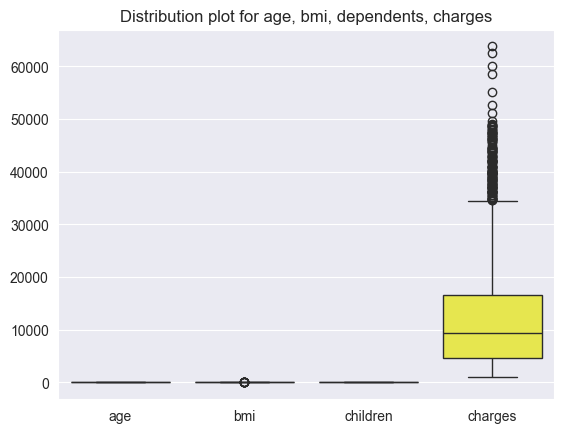

In [8]:
sns.boxplot(data=df.loc[:, ['age', 'bmi', 'children', 'charges' ]],palette='hot')
plt.title("Distribution plot for age, bmi, dependents, charges");

- So as we can most of the outliers are from charges column.

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1.5158796580240388


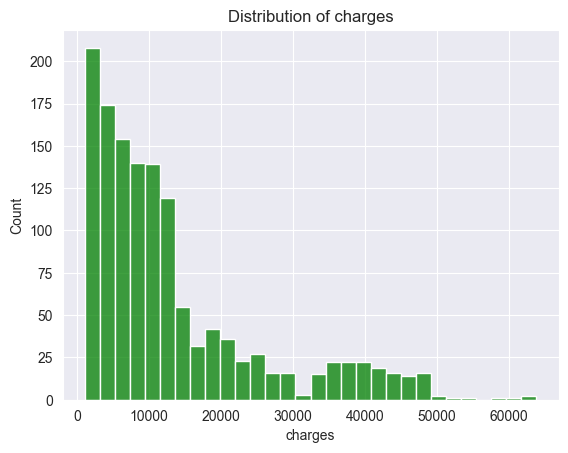

In [10]:
sns.histplot(data=df['charges'], color='g')
plt.title("Distribution of charges")
print(df['charges'].skew())
plt.show()

smoker
no     1064
yes     274
Name: sex, dtype: int64


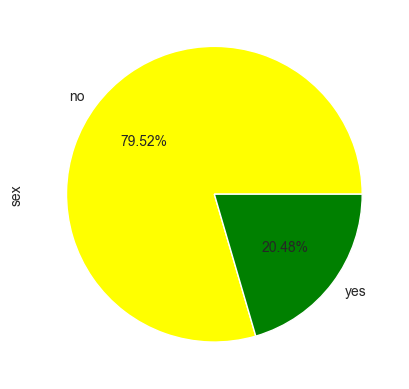

In [28]:
df.groupby('smoker')['sex'].count().plot(kind='pie', colors=['yellow', 'green'], autopct='%.2f%%')
print(df.groupby('smoker')['sex'].count())

- About 20.48% of beneficiaries are smoker.

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


Text(0.5, 1.0, 'Male vs female smoker count')

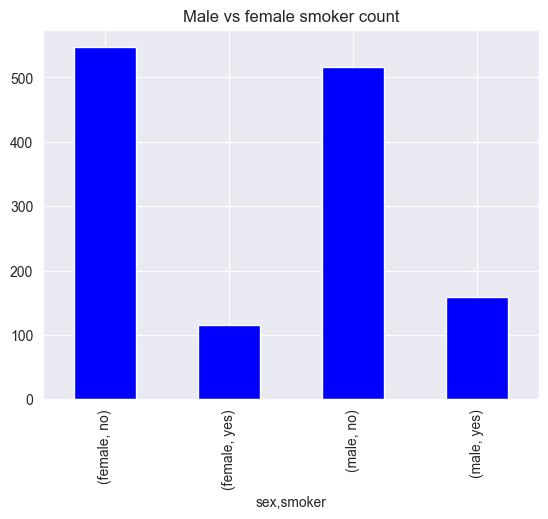

In [24]:
print(df.groupby(['sex', 'smoker']).size())
df.groupby(['sex', 'smoker']).size().plot(kind='bar', color='b')
plt.title('Male vs female smoker count')

- From above analysis we can see that male smoker beneficiaries are slightly higher in count then the female.

Text(0.5, 1.0, 'Age vs charges')

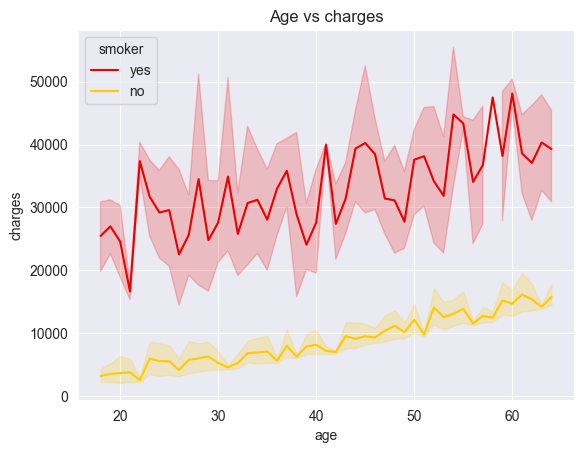

In [13]:
sns.lineplot(x='age', y='charges', data=df, hue='smoker', estimator='mean', palette='hot')
plt.title("Age vs charges")

Text(0.5, 1.0, 'Age vs charges')

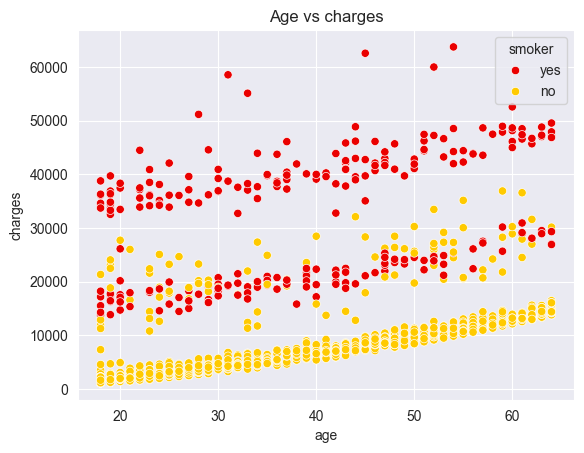

In [14]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='hot')
plt.title("Age vs charges")

- So from above plots we can see the for smoker benificiaries the insurance charges are relatively high, irrespective of their age, for non-smoker beneficiaries the chargers are less. 

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


Text(0.5, 1.0, 'No of Dependents')

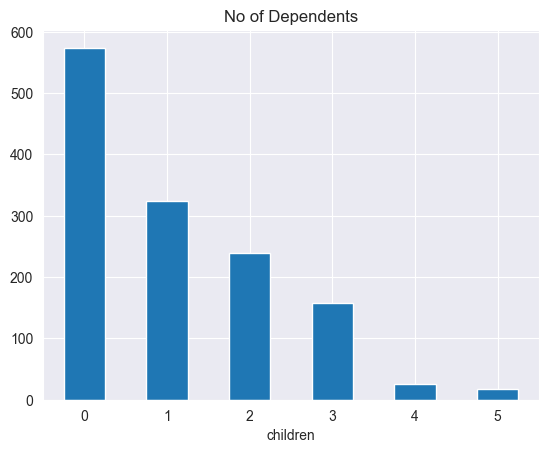

In [33]:
print(df['children'].value_counts())
df['children'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("No of Dependents")

- From the above analysis we can see that maximum no of the beneficiaries are not having dependents.

Text(0.5, 1.0, 'Dependents vs Charges')

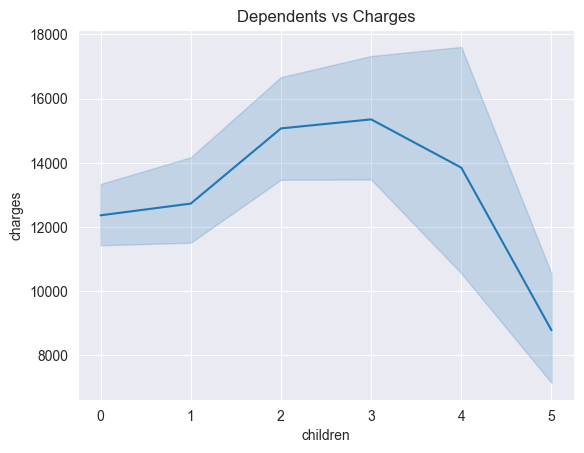

In [32]:
sns.lineplot(x='children', y='charges', data=df)
plt.title('Dependents vs Charges')

- From above analysis we can that people with dependents are charged more.
- But we can also see that beneficiaries with 5 dependents are having the least charged of all.
- Reason could be that the beneficiaries with more then 4 dependents would be opting plan with lowest cover.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Text(0.5, 1.0, 'Residensil area of beneficiary')

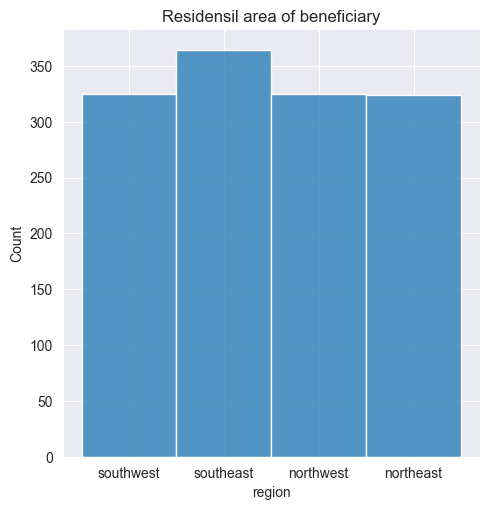

In [31]:
print(df['region'].value_counts())
sns.displot(df['region'])
plt.title('Residensil area of beneficiary')

- Southeast region is slightly more populated with beneficiaries.

0.2840471105987448
30.66339686098655


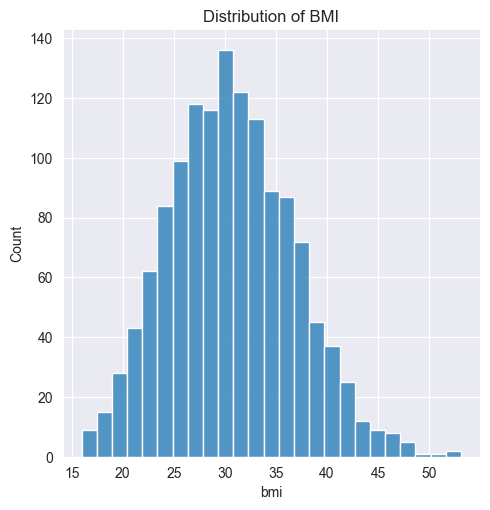

In [30]:
sns.displot(df['bmi'])
plt.title('Distribution of BMI')
print(df['bmi'].skew())
print(df['bmi'].mean())

- Here the BMI is evenly distribute with mean of 30.66 but idealy it should be between 18.5 to 24.9.

Text(0.5, 1.0, 'BMI vs Charges')

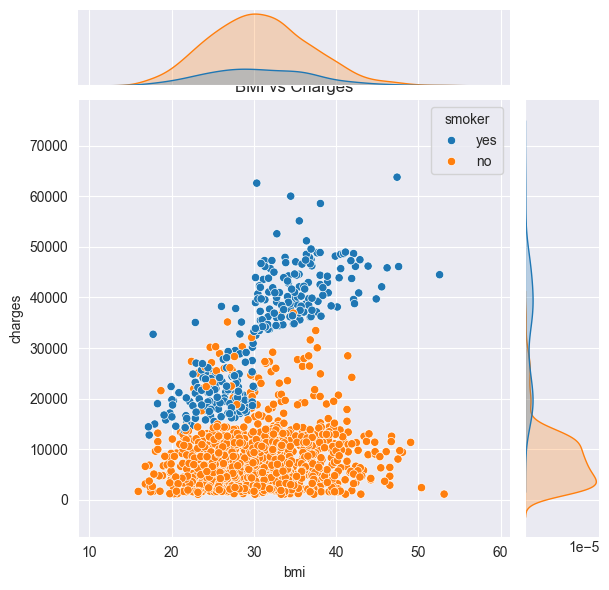

In [35]:
sns.jointplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Charges')

- From above joint plot we can see that if bmi is above ideal renge and beneficiart is not smoker then charges might increase, but if be beneficiary is smoker and bmi is above ideal range then charges will certainly to increase.

In [39]:
df_corr = df[df.select_dtypes(exclude='object').columns].corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Metrix')

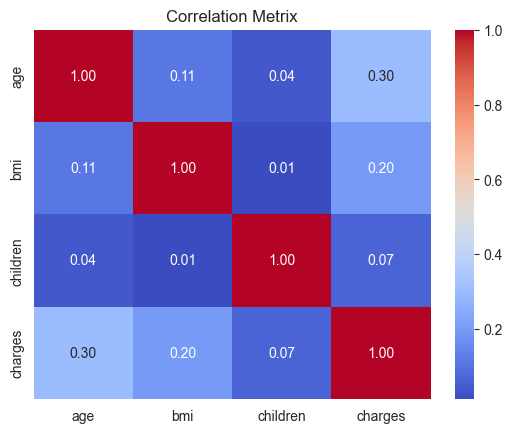

In [41]:
sns.heatmap(data=df_corr, cmap='coolwarm', fmt='.2f', annot=True)
plt.title('Correlation Metrix')

- From this correlation martix we can see that there is no correlation among the x variables and also the correlation with target variable is little  to no.

### Conclusion
- Charges for smoker beneficiary are very high as compared to the non-smoker.
- Charges might increase if the bmi is above ideal range of 18.5 - 24.9 and the beneficiary is non smoker, for beneficiary who smoke and has bmi above the ideal range the charges are cartian to increase.
- Maximum no of beneficiaries don't have depents, charges tend to increase with increase in depandents, but for some reason the charges for depandents wiht beneficiareis with more then 4 is very less this maybe due to these beneficiaries would be buying insurance of lowcost or of low coverge.
- In south east region beneficiaries are slightly more populated then other regions.

### Suggestion

- Company should decrease the cost of insurance or should introduce new plan's for smoking so that more people who smoke will be attracted to insurance.
- Also new plans for beneficiaries with depandents more then 4, as it seems these people are paying charges less then people with no dependes like they are opting for some low coverage plan.